In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from results_analysis.analyze_exp_results import ExpAnalyzer

In [3]:
base_result_dir = "/data/ddmg/redditlanguagemodeling/results/"

## Pre-trained BERT results

In [4]:
result_dir1 = os.path.join(base_result_dir, "1_bert_pretrained")

In [16]:
exp_analyzer1 = ExpAnalyzer(result_dir1)

In [6]:
exp_analyzer1.data_split_perf_df

,data_split,loss,perplexity
0,eval,2.691654,14.756065
1,test,2.721556,15.203968


In [7]:
exp_analyzer1.sr_result_df

,subreddit,loss,perplexity
0,AskDocs,2.801101,16.462758
1,Bitcoin,2.726657,15.281713
2,family,2.453645,11.630666
3,investing,2.748518,15.619470
4,medical,3.063607,21.404629
5,mentalhealth,2.660845,14.308375
6,personalfinance,2.540106,12.681016
7,relationship_advice,2.670200,14.442859
8,relationships,2.385309,10.862418


In [9]:
exp_analyzer1.sr_result_df.mean()

loss           2.672221
perplexity    14.743767
dtype: float64

In [11]:
exp_analyzer1.sr_result_df.std()

loss          0.201947
perplexity    3.115878
dtype: float64

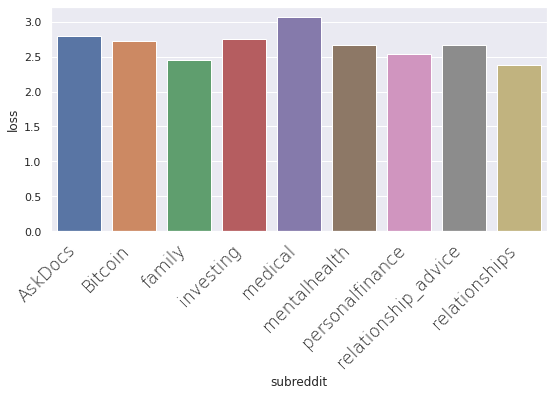

<Figure size 432x288 with 0 Axes>

In [8]:
exp_analyzer1.plot_perf_by_subreddit("loss")

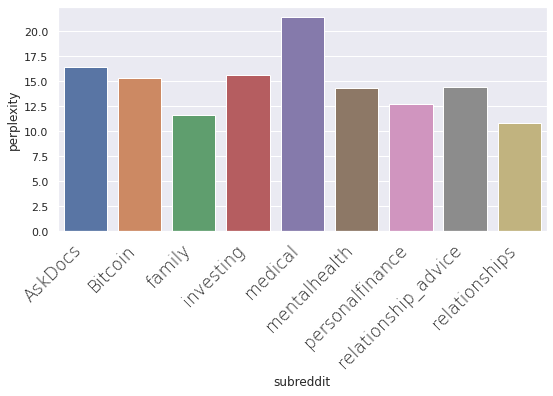

<Figure size 432x288 with 0 Axes>

In [12]:
exp_analyzer1.plot_perf_by_subreddit("perplexity")

In [6]:
exp_analyzer1.author_result_df

,author,loss,perplexity
0,101111,4.408317,82.131089
1,123wanderlust,3.090852,21.995821
2,19931,2.140934,8.507380
3,1blockologist,2.743612,15.543026
4,1gudboi,2.220131,9.208541
...,...,...,...
591,your_godammn_right,2.511896,12.328284
592,zcc0nonA,2.961980,19.336226
593,zomgitsduke,2.430256,11.361786
594,ztsmart,2.536563,12.636171


In [14]:
exp_analyzer1.author_result_df.mean()

loss           2.762923
perplexity    18.802296
dtype: float64

In [15]:
exp_analyzer1.author_result_df.std()

loss           0.564246
perplexity    13.278986
dtype: float64

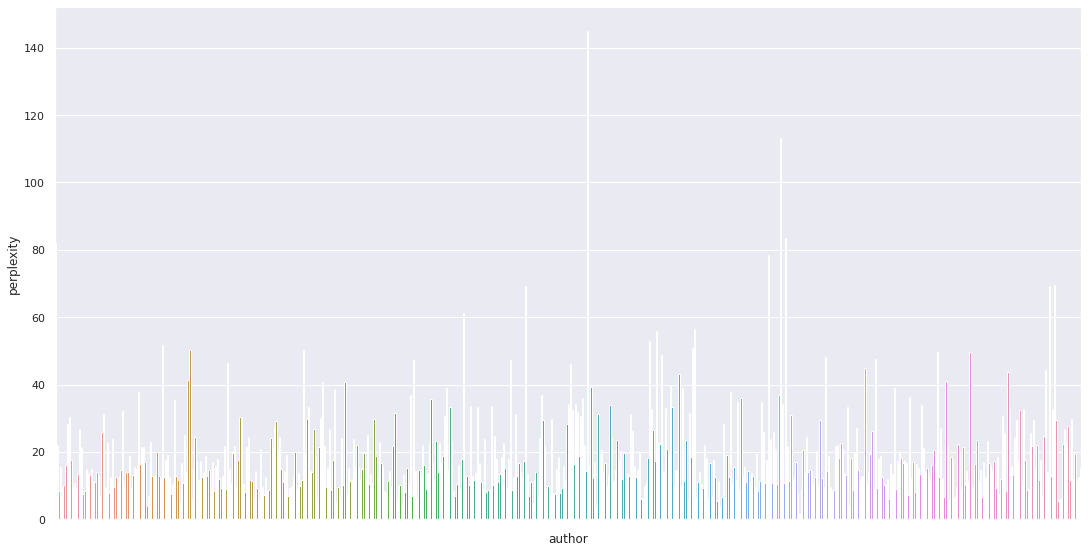

<Figure size 432x288 with 0 Axes>

In [17]:
exp_analyzer1.plot_perf_by_author("perplexity")

## BERT + Fine-tune on All Reddit Results

In [8]:
result_dir2 = os.path.join(base_result_dir, "2_bert_finetuned")

In [9]:
exp_analyzer2 = ExpAnalyzer(result_dir2)

In [10]:
exp_analyzer2.data_split_perf_df

,data_split,loss,perplexity
0,train,1.586269,4.885485
1,eval,1.585292,4.880719
2,test,1.619855,5.052359


In [11]:
exp_analyzer2.sr_result_df

,subreddit,loss,perplexity
0,AskDocs,1.520442,4.574244
1,Bitcoin,1.847334,6.342889
2,family,1.488848,4.431989
3,investing,1.341149,3.823435
4,medical,2.003002,7.411274
5,mentalhealth,1.569690,4.805158
6,personalfinance,1.631887,5.113514
7,relationship_advice,1.395025,4.035074
8,relationships,1.329563,3.779390


In [12]:
exp_analyzer2.sr_result_df.mean()

loss          1.569660
perplexity    4.924108
dtype: float64

In [13]:
exp_analyzer2.sr_result_df.std()

loss          0.228603
perplexity    1.220952
dtype: float64

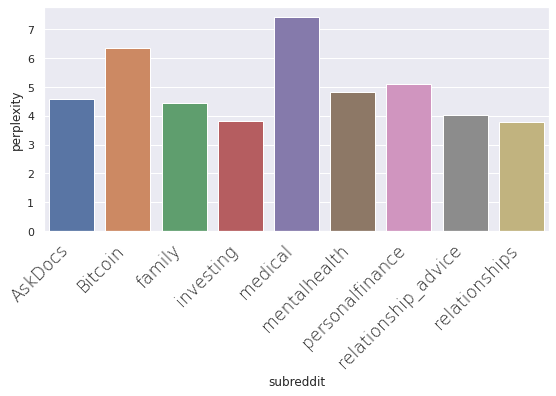

<Figure size 432x288 with 0 Axes>

In [14]:
exp_analyzer2.plot_perf_by_subreddit("perplexity")

In [15]:
exp_analyzer2.author_result_df

,author,loss,perplexity
0,101111,1.994584,7.349148
1,123wanderlust,2.767086,15.912195
2,19931,1.532237,4.628518
3,1blockologist,1.962229,7.115171
4,1gudboi,1.739380,5.693814
...,...,...,...
591,your_godammn_right,1.579458,4.852326
592,zcc0nonA,1.941078,6.966254
593,zomgitsduke,1.955971,7.070779
594,ztsmart,2.010419,7.466443


In [19]:
exp_analyzer2.author_result_df[exp_analyzer2.author_result_df["author"] == "slvbtc"]

,author,loss,perplexity
529,slvbtc,1.883989,6.5797


In [29]:
exp_analyzer2.author_result_df.mean()

loss          1.758243
perplexity    6.563281
dtype: float64

In [30]:
exp_analyzer2.author_result_df.std()

loss          0.472632
perplexity    3.925941
dtype: float64

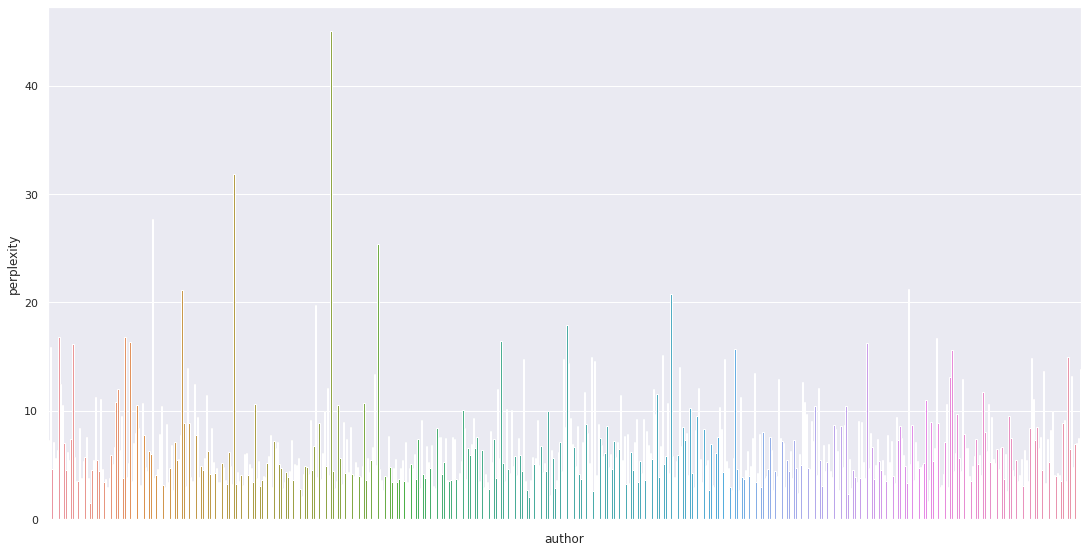

<Figure size 432x288 with 0 Axes>

In [31]:
exp_analyzer2.plot_perf_by_author("perplexity")

## BERT + finetune all Reddit + subreddit specific fine-tune

In [4]:
result_dir3 = os.path.join(base_result_dir, "3_bert_finetuned")

### AskDocs Subreddit

In [33]:
ad_dir = os.path.join(result_dir3, "subreddit", "AskDocs")

In [34]:
exp_analyzer3_ad = ExpAnalyzer(ad_dir)

In [36]:
exp_analyzer3_ad.data_split_perf_df

,data_split,loss,perplexity
0,train,1.523691,4.589133
1,eval,1.418512,4.130970
2,test,1.432229,4.188024


### Bitcoin Subreddit

In [5]:
bc_dir = os.path.join(result_dir3, "subreddit", "Bitcoin")

In [6]:
exp_analyzer3_bc = ExpAnalyzer(bc_dir)

In [7]:
exp_analyzer3_bc.data_split_perf_df

,data_split,loss,perplexity
0,train,1.758674,5.804735
1,eval,1.592692,4.916969
2,test,1.606209,4.983880


## BERT + finetune all Reddit + author specific fine-tune

In [5]:
a1_dir = os.path.join(result_dir3, "author", "itsnotthot")

In [6]:
exp_analyzer3_a1 = ExpAnalyzer(a1_dir)

In [7]:
exp_analyzer3_a1.data_split_perf_df

,data_split,loss,perplexity
0,train,1.591197,4.909622
1,eval,1.819716,6.170108
2,test,1.569111,4.802377


In [18]:
a2_dir = os.path.join(result_dir3, "author", "slvbtc")
exp_analyzer3_a2 = ExpAnalyzer(a2_dir)
exp_analyzer3_a2.data_split_perf_df

,data_split,loss,perplexity
0,train,1.980919,7.249400
1,eval,1.849349,6.355684
2,test,1.858409,6.413527
